In [2]:
#### Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

#### Part I - Data Preparation and Wrangling

***Data Loading and Preparation***:

  - Are there any missing values? Ideally, there shouldn't be any.
  - Are there any variables which are of an incorrect datatype? For e.g. categorical columns are stored as integers in the data set. In case you encounter such issues, make sure you convert the columns to the correct datatypes.

In [4]:
## Load the dataset
df = pd.read_csv('data_app.csv')

In [5]:
df.head()

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
0,1001,1,Male,34,1,2,57,1,18,5760
1,1002,1,Female,36,1,2,5,1,6,1830
2,1003,1,Female,43,1,1,12,1,9,2682
3,1004,1,Male,47,1,1,70,1,21,6846
4,1005,1,Male,41,1,2,13,1,11,3377


In [6]:
df.shape

(4000, 10)

In [7]:
## Check the datatypes and missing values
## Hint - You can evaluate both using a single method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   4000 non-null   int64 
 1   Adopt        4000 non-null   int64 
 2   Gender       4000 non-null   object
 3   Age          4000 non-null   int64 
 4   Nationality  4000 non-null   int64 
 5   Loyalty      4000 non-null   int64 
 6   Tenure       4000 non-null   int64 
 7   Post         4000 non-null   int64 
 8   NumBookings  4000 non-null   int64 
 9   Spending     4000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 312.6+ KB


##### Record your observations

1. No column has null values. (Shape shows 4000 rows and the Non-Null count also shows 4000 rows)
2. Every Column is an Integer apart from the Gender (We can say gender is an categorical variable).

### Convert the columns which are of incorrect datatypes (if any) to the correct datatype

Personally I think converting the Gender column from Object (String) to integer will make analysis easier.
 - set Male = 0, and Female = 1.
 - By doing this Summing up proportions will be easier in my opinion.

In [8]:
## Creating a mapping for replacing the variables.
gender_mapping = {
    "Female": 1,
    "Male": 0
}

### Testing the gender mapping.

In [9]:
def test_gender_mapping(df: pd.DataFrame) -> None:
    """
    Testing the Conversion of Gender column from
    string to integer. following are the mappings:
    1. Male = 0
    2. Female = 1.

    the test asserts condition that mapping is done properly.

    Parameters
    ----
    df: pd.DataFrame
        The dataframe should consist of "Gender" column with string variables.

    Asserts
    --------
    results: tuple booleans
        True if gender mappings are proper.
        False if gender mappings not proper.
    """

    df_copy = df.copy()
    
    gender_mapping = {
        "Female": 1,
        "Male": 0
    }
    
    df_copy['Gender'] = df_copy['Gender'].replace(gender_mapping)

    df_index_m = df[df['Gender'] == "Male"].index
    df_copy_index_m = df_copy[df_copy['Gender'] == 0].index

    df_index_f = df[df['Gender'] == "Female"].index
    df_copy_index_f = df_copy[df_copy['Gender'] == 1].index

    assert ((df_index_m == df_copy_index_m).all(), (df_index_f == df_copy_index_f).all()) == (True, True)

In [10]:
test_gender_mapping(df)

#### Creating Copy of Dataframe.

We will use the copy of the dataframe, so the original values are preserved in old dataframe as backup.

In [11]:
old_df = df.copy()

### Mapping the Genders to their numbers.

In [12]:
df['Gender_int'] = df['Gender'].replace(gender_mapping)

#### Part II: Exploratory Data Analysis

***Univariate Analysis I: Data summary of customers’ characteristics***

   - Use appropriate tables for the summary statistics and charts and describe the customers’ characteristics. You may restrict yourself to the univariate analysis of these variables:

          - Demographics: Gender, age, nationality
          - Loyalty membership and tenure with the hotel chain (in months)

In [13]:
### Before starting with Univariate Analysis, make sure to filter the dataframe to only include one period, either Post = 0 or Post = 1
### This way there won't be any repetitions in demographics data for the same customer

### WRITE CODE FOR FILTERING THE DATAFRAME
pre_download_df = df[df['Post'] == 0]
post_download_df = df[df['Post'] == 1]

#### Testing the filters

In [14]:
assert (pre_download_df['Post'] == 0).all() == True
assert (post_download_df['Post'] == 1).all() == True

### Next let's start making plots to describe each customer characteristic using the above filtered dataframe

Hint - If you're unsure what plots/summary statistics to use, inspect the datatypes (categorical or numerical) for the demographic characteristics \
Next, revise your EDA I and EDA II modules to understand which charts are useful for a specific datatype

### WRITE CODE FOR ANALYSING "GENDER" VARIABLE

In [15]:
pre_download_df[['Gender', 'Gender_int']]

,Gender,Gender_int
1000,Male,0
1001,Female,1
1002,Female,1
1003,Male,0
1004,Male,0
...,...,...
3995,Male,0
3996,Female,1
3997,Female,1
3998,Male,0


#### Frequency of gender in the tests

##### Plotting the bar graph.


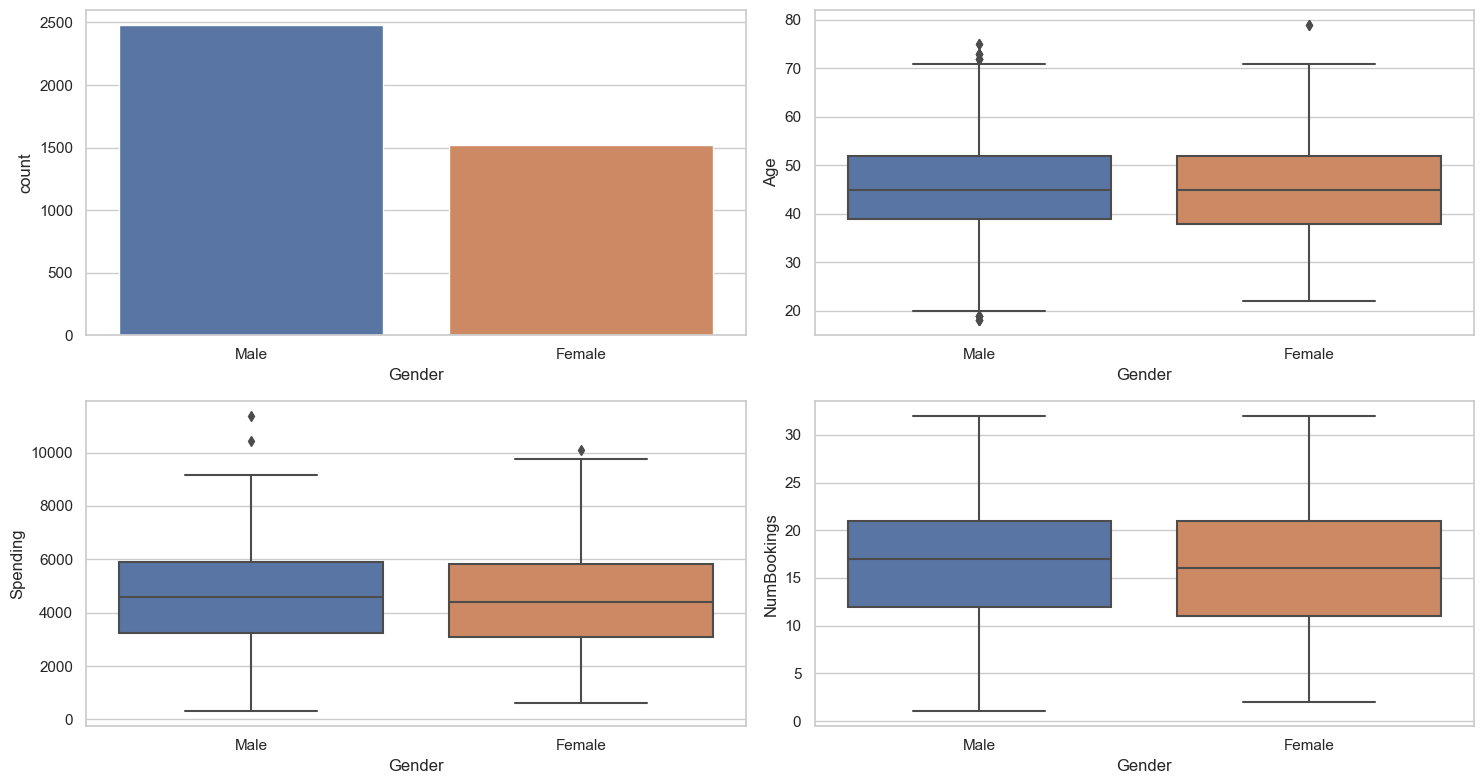

In [16]:

# Plotting Gender variable
plt.figure(figsize=(15, 8))

# Subplot 1: Gender distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=df)

# Subplot 2: Gender vs. Age
plt.subplot(2, 2, 2)
sns.boxplot(x='Gender', y='Age', data=df)

# Subplot 3: Gender vs. Spending
plt.subplot(2, 2, 3)
sns.boxplot(x='Gender', y='Spending', data=df)

# Subplot 4: Gender vs. NumBookings
plt.subplot(2, 2, 4)
sns.boxplot(x='Gender', y='NumBookings', data=df)

plt.tight_layout()
plt.show()

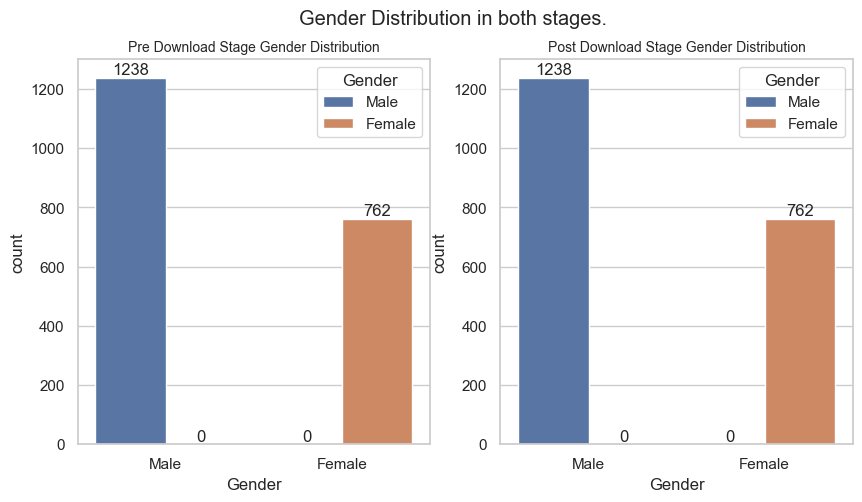

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Gender Distribution in both stages.")

## Figure 1 for pre download stage.
barplot_1 = sns.countplot(data=pre_download_df, x='Gender', hue='Gender', ax=ax[0])
barplot_1.set_title('Pre Download Stage Gender Distribution', fontsize=10)
barplot_1.bar_label(barplot_1.containers[0])
barplot_1.bar_label(barplot_1.containers[1])

## Figure 2 for Post download stage.
barplot_2 = sns.countplot(data=post_download_df, x='Gender', hue='Gender', ax=ax[1])
barplot_2.set_title('Post Download Stage Gender Distribution', fontsize=10)
barplot_2.bar_label(barplot_2.containers[0])
barplot_2.bar_label(barplot_2.containers[1])

plt.show()

In [18]:
### WRITE CODE FOR ANALYSING "NATIONALITY" VARIABLE
df['Nationality'].value_counts()

Nationality
1    3176
0     824
Name: count, dtype: int64

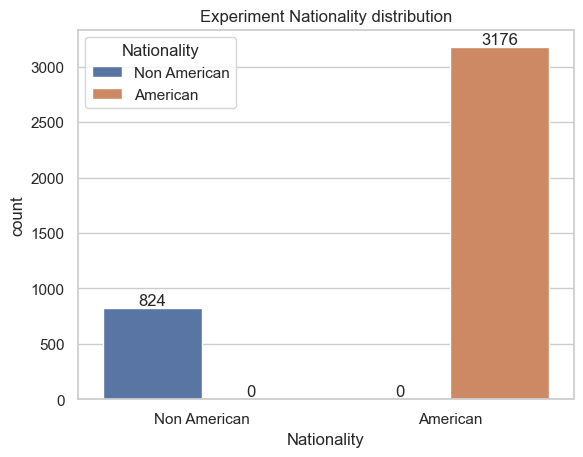

In [19]:
ax = sns.countplot(data=df, x='Nationality', hue='Nationality')
# ax.set_xticks(range(0, 2))
labels = ['Non American', 'American']
ax.set_title('Experiment Nationality distribution')
ax.set_xticklabels(labels)

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

## Editing the legend texts.
for t, l in zip(ax.get_legend().texts, labels):
    t.set_text(l)



plt.show()

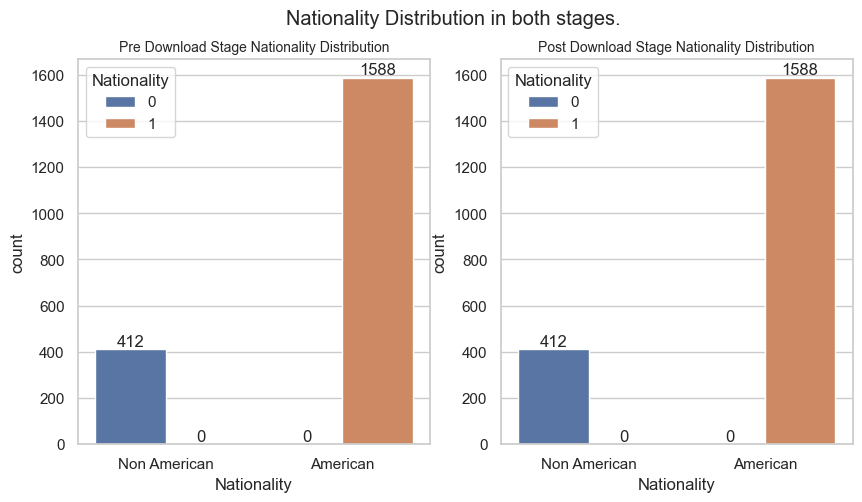

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Nationality Distribution in both stages.")

## Figure 1 for pre download stage.
barplot_1 = sns.countplot(data=pre_download_df, x='Nationality', hue='Nationality', ax=ax[0])
barplot_1.set_title('Pre Download Stage Nationality Distribution', fontsize=10)
barplot_1.set_xticklabels(['Non American', 'American'])
barplot_1.bar_label(barplot_1.containers[0])
barplot_1.bar_label(barplot_1.containers[1])

## Figure 2 for Post download stage.
barplot_2 = sns.countplot(data=post_download_df, x='Nationality', hue='Nationality', ax=ax[1])
barplot_2.set_title('Post Download Stage Nationality Distribution', fontsize=10)
barplot_2.bar_label(barplot_2.containers[0])
barplot_2.bar_label(barplot_2.containers[1])
barplot_2.set_xticklabels(['Non American', 'American'])
plt.show()

### Analysing Loyalty

In [21]:
df['Loyalty'].describe()

count    4000.00000
mean        1.77300
std         0.88015
min         1.00000
25%         1.00000
50%         2.00000
75%         2.00000
max         4.00000
Name: Loyalty, dtype: float64

In [46]:
pre_download_loyalty_df = pre_download_df['Loyalty'].value_counts().reset_index()
post_download_loyalty_df = post_download_df['Loyalty'].value_counts().reset_index()

In [47]:
post_download_df

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending,Gender_int
0,1001,1,Male,34,1,2,57,1,18,5760,0
1,1002,1,Female,36,1,2,5,1,6,1830,1
2,1003,1,Female,43,1,1,12,1,9,2682,1
3,1004,1,Male,47,1,1,70,1,21,6846,0
4,1005,1,Male,41,1,2,13,1,11,3377,0
...,...,...,...,...,...,...,...,...,...,...,...
2995,996,0,Male,25,1,1,16,1,6,1488,0
2996,997,0,Female,51,0,1,54,1,17,4403,1
2997,998,0,Female,39,1,2,58,1,19,4370,1
2998,999,0,Male,23,1,4,57,1,20,5020,0


In [49]:
pre_download_df

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending,Gender_int
1000,1001,1,Male,34,1,2,57,0,14,3976,0
1001,1002,1,Female,36,1,2,5,0,5,1455,1
1002,1003,1,Female,43,1,1,12,0,6,1656,1
1003,1004,1,Male,47,1,1,70,0,18,5148,0
1004,1005,1,Male,41,1,2,13,0,6,1782,0
...,...,...,...,...,...,...,...,...,...,...,...
3995,996,0,Male,25,1,1,16,0,5,1420,0
3996,997,0,Female,51,0,1,54,0,15,4395,1
3997,998,0,Female,39,1,2,58,0,18,5166,1
3998,999,0,Male,23,1,4,57,0,18,4896,0


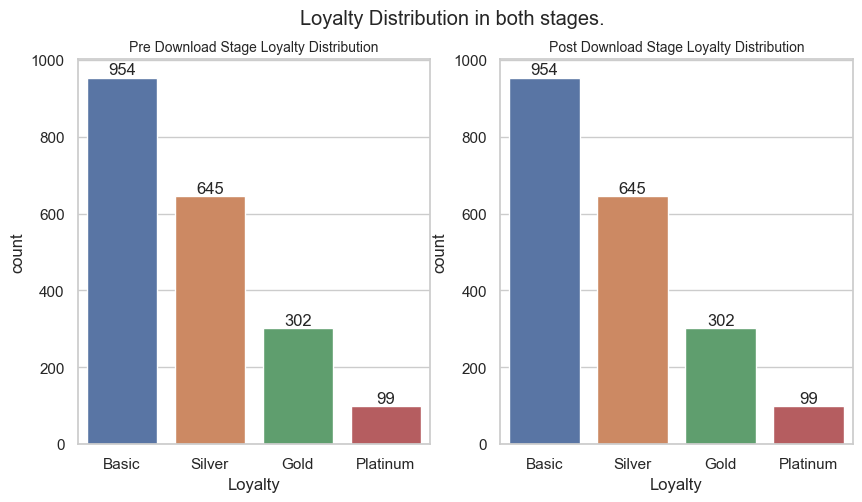

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Loyalty Distribution in both stages.")
labels = ['Basic', 'Silver', 'Gold', 'Platinum']

## Figure 1 for pre download stage.
barplot_1 = sns.barplot(data=pre_download_loyalty_df, x='Loyalty', y='count', ax=ax[0])
barplot_1.set_title('Pre Download Stage Loyalty Distribution', fontsize=10)
barplot_1.set_xticklabels(labels)
barplot_1.bar_label(barplot_1.containers[0])

## Figure 2 for Post download stage.
barplot_2 = sns.barplot(data=post_download_loyalty_df, x='Loyalty', y='count', ax=ax[1])
barplot_2.set_title('Post Download Stage Loyalty Distribution', fontsize=10)
barplot_2.set_xticklabels(labels)
barplot_2.bar_label(barplot_2.containers[0])
plt.show()

#### Loyalty genderwise.

In [24]:
fe_pre_download_loyalty_df = pre_download_df[pre_download_df['Gender_int'] == 1]['Loyalty'].value_counts().reset_index()
m_pre_download_loyalty_df = pre_download_df[pre_download_df['Gender_int'] == 0]['Loyalty'].value_counts().reset_index()
fe_post_download_loyalty_df = post_download_df[post_download_df['Gender_int'] == 1]['Loyalty'].value_counts().reset_index()
m_post_download_loyalty_df = post_download_df[post_download_df['Gender_int'] == 0]['Loyalty'].value_counts().reset_index()

In [25]:
m_post_download_loyalty_df

,Loyalty,count
0,1,580
1,2,415
2,3,184
3,4,59


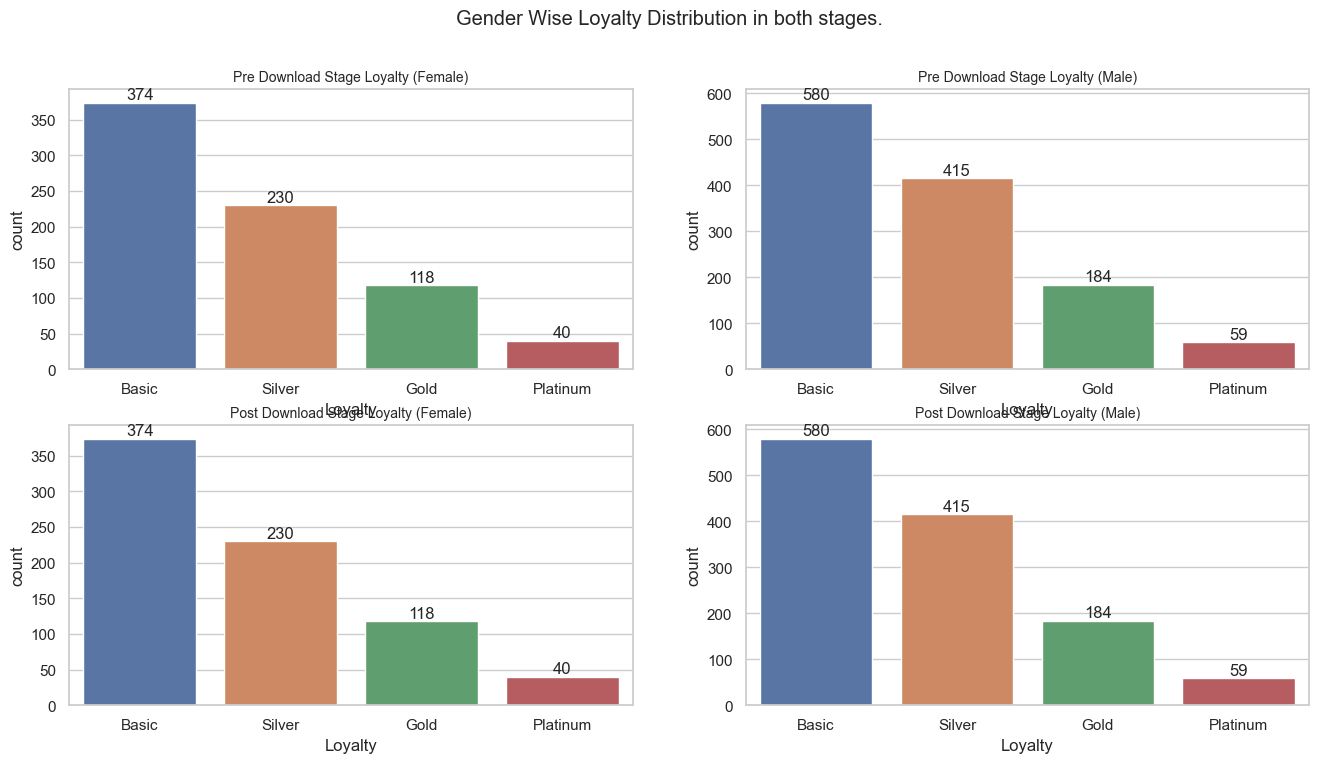

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle("Gender Wise Loyalty Distribution in both stages.")
labels = ['Basic', 'Silver', 'Gold', 'Platinum']

## Figure 1 for pre download stage.
barplot_1 = sns.barplot(data=fe_pre_download_loyalty_df, x='Loyalty', y='count', ax=ax[0][0])
barplot_1.set_title('Pre Download Stage Loyalty (Female)', fontsize=10)
barplot_1.set_xticklabels(labels)
barplot_1.bar_label(barplot_1.containers[0])

## Figure 2 for Post download stage.
barplot_2 = sns.barplot(data=m_pre_download_loyalty_df, x='Loyalty', y='count', ax=ax[0][1])
barplot_2.set_title('Pre Download Stage Loyalty (Male)', fontsize=10)
barplot_2.set_xticklabels(labels)
barplot_2.bar_label(barplot_2.containers[0])

barplot_3 = sns.barplot(data=fe_post_download_loyalty_df, x='Loyalty', y='count', ax=ax[1][0])
barplot_3.set_title('Post Download Stage Loyalty (Female)', fontsize=10)
barplot_3.set_xticklabels(labels)
barplot_3.bar_label(barplot_3.containers[0])

barplot_4 = sns.barplot(data=m_post_download_loyalty_df, x='Loyalty', y='count', ax=ax[1][1])
barplot_4.set_title('Post Download Stage Loyalty (Male)', fontsize=10)
barplot_4.set_xticklabels(labels)
barplot_4.bar_label(barplot_4.containers[0])

plt.show()

### WRITE CODE FOR ANALYSING "AGE"

In [45]:
df['Age'].max() - df['Age'].min()

61

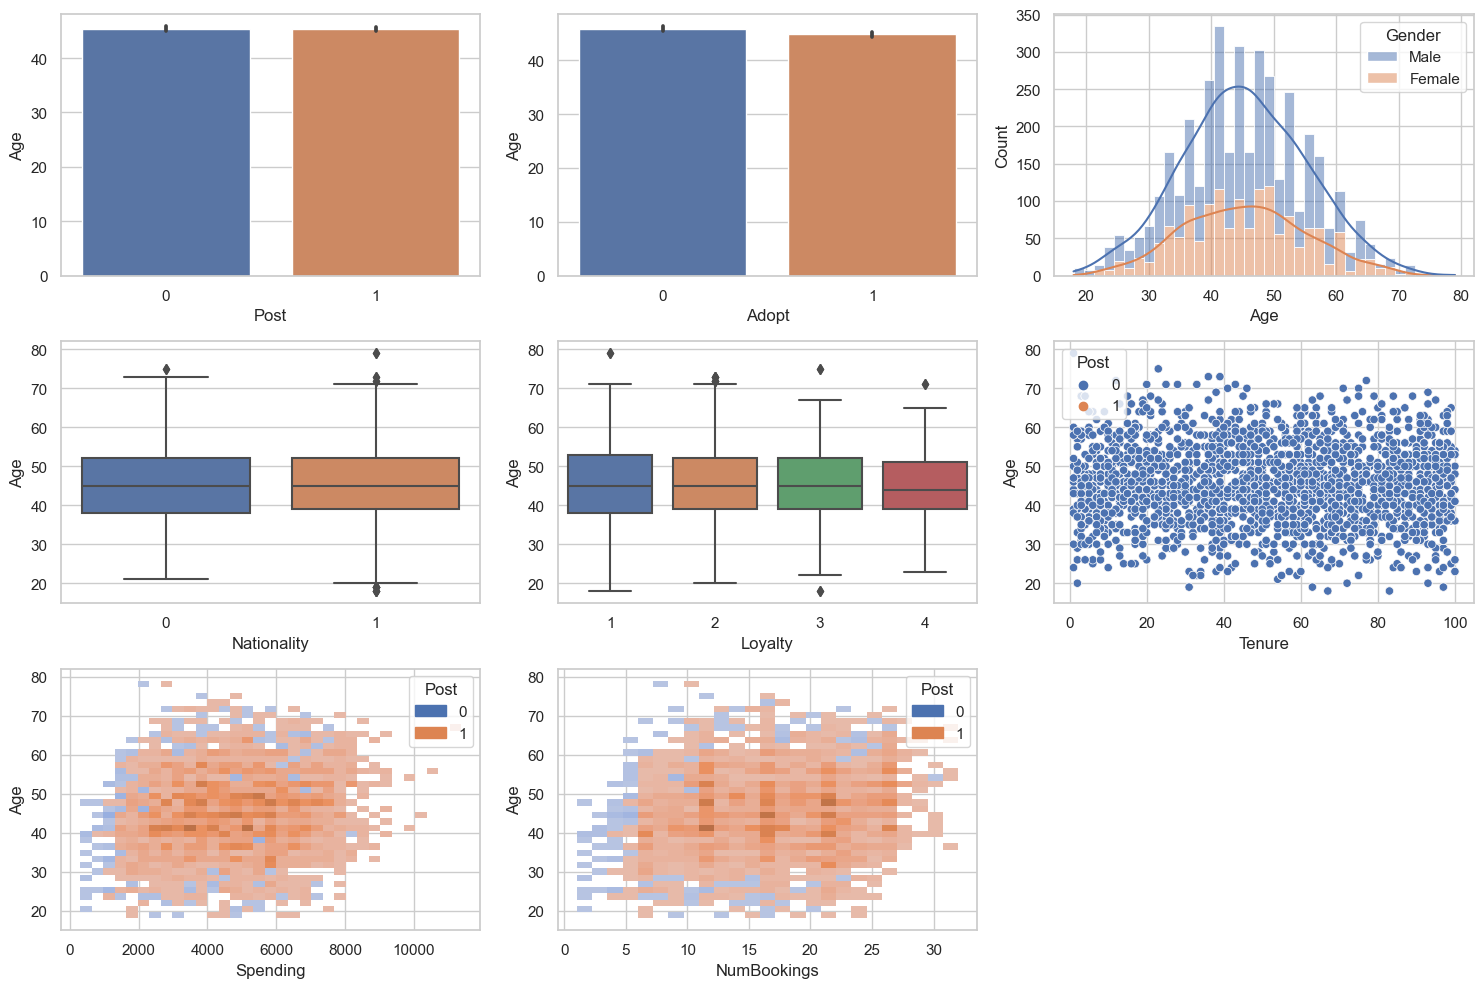

In [30]:
# Plotting age with other variables
plt.figure(figsize=(15, 10))

# Subplot 1: Post and Adopt Variables
plt.subplot(3, 3, 1)
sns.barplot(x='Post', y='Age', data=df)

plt.subplot(3, 3, 2)
sns.barplot(x='Adopt', y='Age', data=df)

# Subplot 2: Gender Variable
plt.subplot(3, 3, 3)
sns.histplot(x='Age', hue='Gender', data=df, multiple="stack", kde=True)

# Subplot 3: Nationality Variable
plt.subplot(3, 3, 4)
sns.boxplot(x='Nationality', y='Age', data=df)

# Subplot 4: Loyalty Variable
plt.subplot(3, 3, 5)
sns.boxplot(x='Loyalty', y='Age', data=df)

# Subplot 5: Tenure Variable
plt.subplot(3, 3, 6)
sns.scatterplot(x='Tenure', y='Age', hue='Post', data=df)

plt.subplot(3, 3, 7)
sns.histplot(x='Spending', y='Age', data=df, multiple="stack", kde=True, hue='Post')

# Alternative plot for NumBookings vs. Age
plt.subplot(3, 3, 8)
sns.histplot(x='NumBookings', y='Age', data=df, multiple="stack", kde=True,  hue='Post')

plt.tight_layout()
plt.show()

#### Part II: Exploratory Data Analysis

***Univariate Analysis II: Data summary of customers’ purchase behavior***

   - Use appropriate tables for the summary statistics and graphs and describe customers’ purchase behavior. You may restrict yourself to the univariate analysis of these variables::

          - Amount spent [Spending]
          - Number of bookings [NumBookings]

In [32]:
### For amount spent and number of bookings, we will get 2 values for the same customer
### One for Post = 0 and another for Post = 1
### You can analyze the data separately for Post = 0 and Post = 1 phases

### Spending by genders

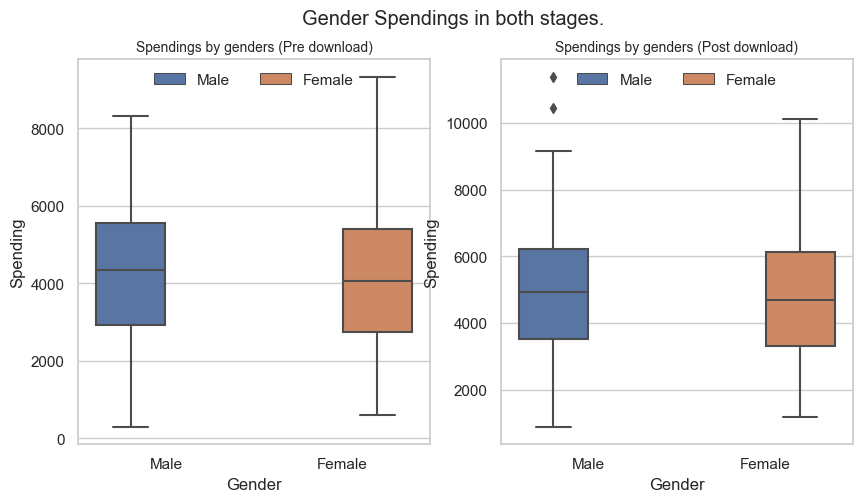

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Gender Spendings in both stages.")

box_plot1 = sns.boxplot(data=pre_download_df, x='Gender', y='Spending', hue='Gender', ax=ax[0])
box_plot1.set_title('Spendings by genders (Pre download)', fontsize=10)
sns.move_legend(box_plot1, "upper center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

box_plot2 = sns.boxplot(data=post_download_df, x='Gender', y='Spending', hue='Gender', ax=ax[1])
box_plot2.set_title('Spendings by genders (Post download)', fontsize=10)
sns.move_legend(box_plot2, "upper center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

plt.show()

**Observations**:

1. 

In [34]:
### WRITE CODE FOR ANALYSING "NUMBOOKINGS"

***Multivariate Analysis:***

   - Construct relevant pivot tables, bar charts, and scatterplots to get a preliminary understanding of the relationship between customers’ characteristics and their purchase behavior. (Generally, bar charts are more informative in the case of categorical variables [e.g., the average of Spending broken up by Gender], while scatterplots convey more information in the case of numerical variables [e.g., Spending versus Age])

In [35]:
### In this section, you are free to choose the variables you want to analyse and the number of analyses you want to perform.
### For example, you can peform the following analyses.

### Analyze the relationship Spending and Gender.
### Analyze the relationship between Spending and Age.
### Analyze the relationship between Spending and Loyalty.
### .... and so on.

### As suggested before, you are free to choose the variables for analysis.
### Also, you're free to use the necessary tools (either pivot tables or visualizations or both) to perform the analyses
### However, make sure that you analyze the patterns for Spending and Number of Bookings against minimum 3 customer characteristics

- Generate a table of the correlations of all numerical variables of the data set.



In [36]:
### Subset the dataframe to only include the numerical variables
### After that you can create a correlation matrix.
### If you want, you can also build a HeatMap, but it's optional.

 - Determine whether there is a statistically significant difference between the average spending of men and women (at a 5% significance level)? Conduct an appropriate hypothesis test to determine whether there is a difference in means. Please construct a 95% confidence interval for the difference in means. You may assume independent samples and constant variance. [Note: The above test is to be conducted for the entire data set]

In [37]:
### This task may seem intimidating at first.
### However, using the ttest method pingouin package which you learned in the "Designing Business Experiments" module, you should be able to get all the results directly.

#### Part III: Statistical Analysis

***After-Only design***
   - To determine the treatment effect of customers’ adoption of the app on their spending with the hotel chain, construct a pivot table of average Spending broken up by Adopt and Post. What is the difference between the treatment and control groups’ spending in the Post =1 period? This is the treatment effect, assuming the experiment is of an After-Only design.

In [38]:
### WRITE CODE FOR CONSTRUCTING A PIVOT TABLE
### Hint - Check the documentation of pivot table


### Report the difference between the spending of treatment and control groups in Post = 1 period.

  - Is the above treatment effect statistically significant? Perform the necessary hypothesis test and construct a 95% confidence interval for the difference. Take the level of significance as 0.05

In [39]:
### Hint - Once again, you can use the ttest method in the pingouin package to perform this task quickly.

***Before-After design***


- Construct a new DataFrame, where for each customer, you have a new variable, which is the difference in spending between the Post = 1 and Post= 0 periods.


In [40]:
### This task can be slightly challenging and hence for performing this we have suggested the following approach
### Step 1 - Create 2 separate temporary dataframes, each filtered by Post = 1 and Post = 0 periods
### Step 2 - Merge these two dataframes using the pandas.merge() method based on the "CustomerID" and store this in a new Dataframe
### Step 3 - After merging, you may encounter repeated columns (denoted by a suffix like "_x" & "_y" ). Identify which ones you want to keep
###, and which ones you want to drop. Make sure you keep the Spending columns for both Post = 1 and Post = 0 periods.
### Step 4 - In the new merged Dataframe, create a new column which is the difference between the Spending in Post = 1 and Post = 0 for each customer
### For ease of use, you can name this column as "Diff". This will be useful in the final task of this section

The above suggested approach is one of the many ways in which you can complete this task. Here are some helpful links for understanding how to use the `pandas.merge` method
- [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)
- [Youtube tutorial](https://www.youtube.com/watch?v=h4hOPGo4UVU)

---

- Compute the average spending difference between those with Adopt = 1 and those with Adopt = 0 in both the Post = 1 and Post = 0 periods. Call these differences Difference1 and Difference0. Compute the difference between these two differences as Difference1 – Difference0. This is the treatment effect in the Before-After design.

In [41]:
### To understand what why you're doing this, you can use the following image as a reference
### You have already learned this in the second session of the Designing Business Experiments module
### This is how you evaluate the treatment effect( or, Lift) in a Before-After Design

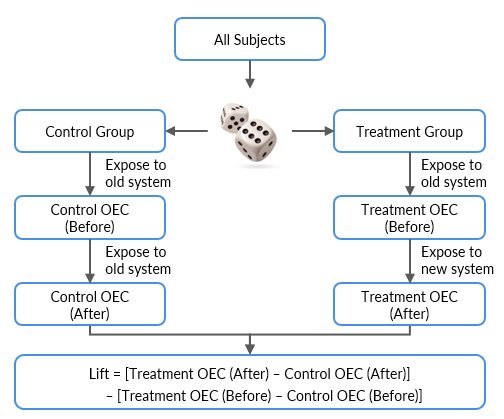

In case the above image isn't opening please use this [link](https://images.upgrad.com/48d5bfcc-c3e5-4ef3-9c5a-460568c08480-Image2.png)


In [42]:
## Once you go through the image, the task is fairly straightforward to do. Here is one of the suggested approaches
## Calculate the average spending for Customers from control group (Adopt = 0) in the period Post = 0
## Calculate the average spending for Customers from treamtent group (Adopt = 1) in the period Post = 0
## Calculate the difference between the above two values. This will be Difference0 (or Treatment OEC(Before) - Control OEC (Before))

## After the above, repeat the same steps for Post = 1 period
## Calculate the average spending for Customers from control group (Adopt = 0) in the period Post = 1
## Calculate the average spending for Customers from treamtent group (Adopt = 1) in the period Post = 1
## Calculate the difference between the above two values. This will be Difference1 (or Treatment OEC(After) - Control OEC (After))

### Finally calculate the difference between these two values (Difference1 - Difference0) to obtain the treatment effect.

- Is the above treatment effect statistically significant? Similar to the previous step, perform the necessary hypothesis test and construct a 95% confidence interval for the difference in differences. Take the level of significance as 0.05

In [43]:
### Once again, you can peform this task using the pingouin package
### In addition, you can use the "Diff" column from new DataFrame that you created in the first task of this section
### This will help in providing inputs to the ttest method from pingouin package.